# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**Caitlins link** https://github.com/cnordheim-maestas/eds-220-hwk4.git

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
### ===== FINAL CODE =====

## Import libraries and functions

In [2]:
# import libraries and functions here
# data manipulations, etc
import os # accessible file paths
import numpy as np # math operations
import pandas as pd # data manipulation & analysis
import geopandas as gpd # geospatial data manipulation
from shapely.geometry import Polygon
import xarray as xr # for n-dimmensional array data
import rioxarray as rioxr # for geospatial n-dimmensional array data
from rasterio.features import rasterize # for rasterizing polygons

# plotting
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for pretty legends

## Import data

In [3]:
# first dataset: USGS landsat bands

# use the os to get the current working directory
land_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
land = rioxr.open_rasterio(land_fp) # use this for geospatial raster data
land # check that it loaded

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [4]:
# second dataset: fire perimeters in California during 2017

# use the os to get the current working directory
fire_fp = os.path.join(os.getcwd(),'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp')
fire = gpd.read_file(fire_fp) # use gpd to read the file because it's a shapefile
fire.head(2) # check that it loaded

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [5]:
# dataset 1 exploration

# check crs, height, width, bounding box
print('CRS: ', land.rio.crs)
print('height: ', land.rio.height)
print('width: ', land.rio.width, '\n')

print('spatial bounding box: ')
print(land.rio.bounds(), '\n')

# look at the data
land

CRS:  EPSG:32611
height:  731
width:  870 

spatial bounding box: 
(121170.0, 3755160.0, 356070.0, 3952530.0) 



<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

Hm... looks very different than the r,g,b bands from lesson 19 rioxarray, we only have 1 band, but the red, green and blue are data variables!

In [6]:
# print the type
type(land)

xarray.core.dataset.Dataset

In [7]:
# explore the values in the datadet
land.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...>

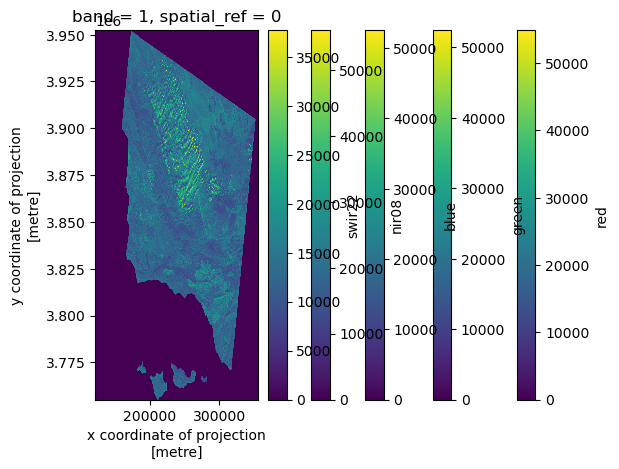

In [8]:
# Exploratory plot

fig, ax= plt.subplots()

#----------------------------------
# Red
land['red'].plot(ax=ax)
# Green
land['green'].plot(ax=ax)
# Blue
land['blue'].plot(ax=ax)
# nir
land['nir08'].plot(ax=ax)
# swir
land['swir22'].plot(ax=ax)

plt.show()

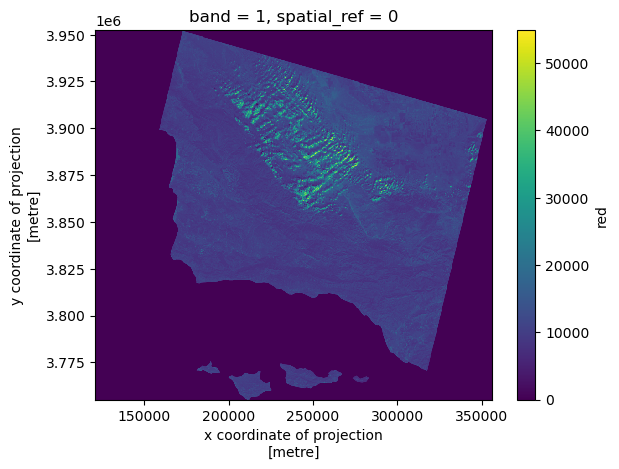

In [9]:
# Here is where I will do the exploratory plot... but I am looking at each color separately in this exploration
land['red'].plot()

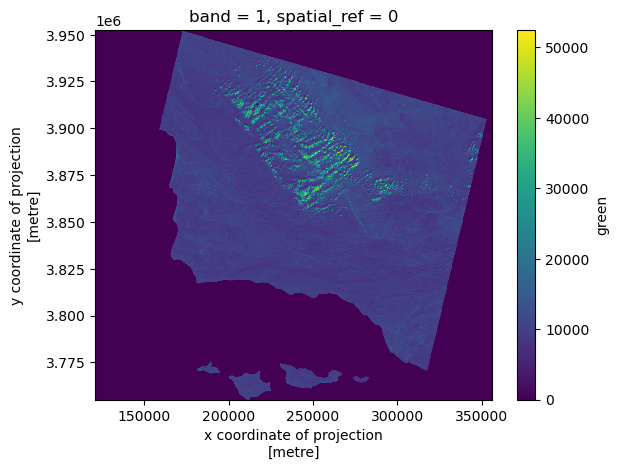

In [10]:
# Here is where I will do the exploratory plot... but I am looking at each color separately in this exploration
land['green'].plot()

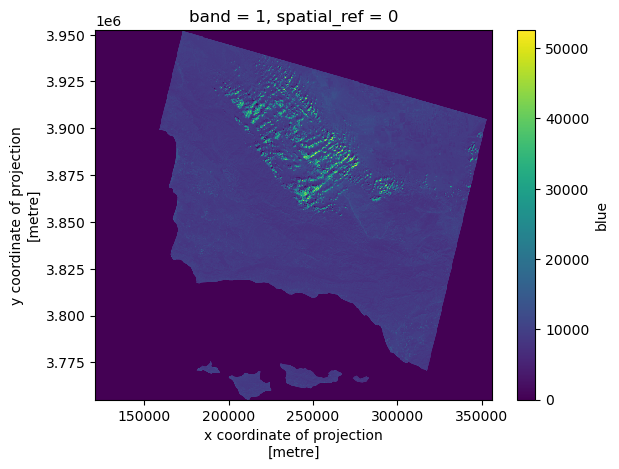

In [11]:
# Here is where I will do the exploratory plot... but I am looking at each color separately in this exploration
land['blue'].plot()

In [12]:
# dataset 2 exploration
# print the CRS
print(fire.crs) # note will need to change crs to match!

# look at first 3 columns
fire.head(3)

epsg:3857


,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."


<AxesSubplot:>

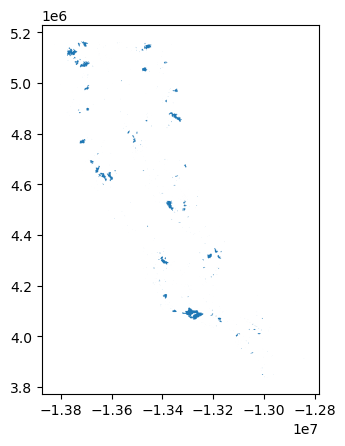

In [13]:
# dataset 2 exploration
# plot fire boundaries
fire.plot()

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [14]:
# view the data, see if it needs any updates (i.e. raster reduction)
land

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [15]:
## Raster reduction
# drop the bands in land data

# remove length 1 dimension (band)
land = land.squeeze()

# remove coordinates associated to band
land = land.drop('band')
land

<xarray.Dataset>
Dimensions:      (y: 731, x: 870)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
    nir08        (y, x) float64 ...
    swir22       (y, x) float64 ...

In [16]:
# make sure CRS' match
fire_reprojected = fire.to_crs(land.rio.crs) # change to the land crs
print('matched crs?',  fire_reprojected.crs == land.rio.crs) # ensure they match

matched crs? True


## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


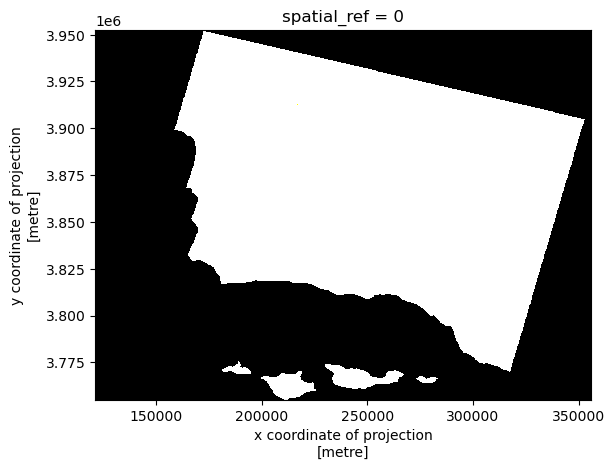

In [47]:
# Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data
land[['red','green','blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

https://docs.xarray.dev/en/stable/generated/xarray.plot.imshow.html

In [44]:
# check min and max values
print(land['red'].min().item()) # check the minimum red value
print(land['red'].max().item()) # check the max red value
print(land['green'].min().item()) # check the minimum gr value
print(land['green'].max().item()) # check the max gr value
print(land['blue'].min().item()) # check the minimum blue value
print(land['blue'].max().item()) # check the max blue value

# check for no data
nodata = land.rio.nodata
print(nodata) # there is no nodata! good!

0.0
54930.71604938272
0.0
52494.25925925926
0.0
52600.32098765432


AttributeError: 'RasterDataset' object has no attribute 'nodata'

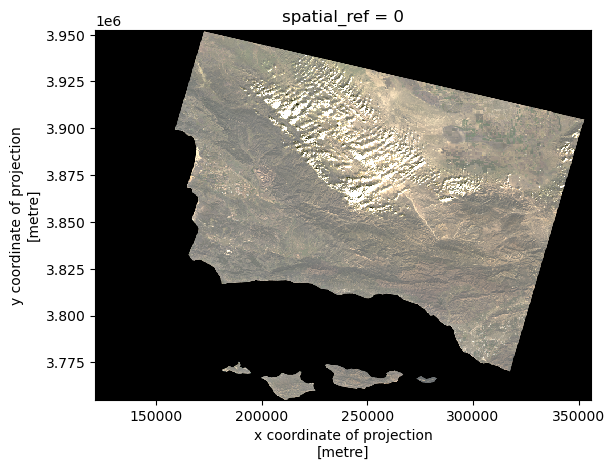

In [48]:
# include robust = True
# "colormap range is computed with 2nd and 98th percentiles instead of the extreme values"
land[['red','green','blue']].to_array().plot.imshow(robust=True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

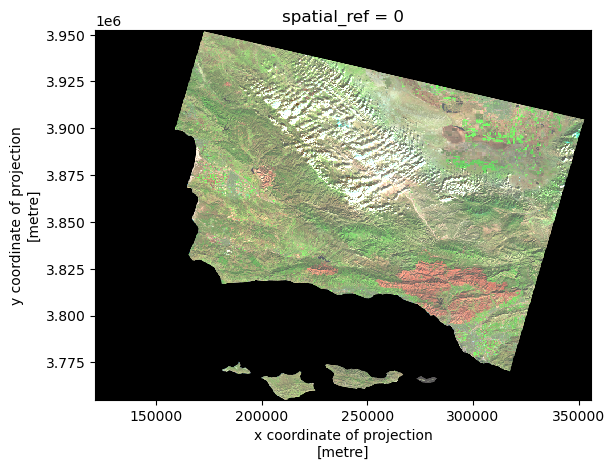

In [46]:
# false color image: short-wave infrared (swir22), near-infrared, and red variables (in that order).
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [49]:
# no updates needed?

## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

In [ ]:
# fig, ax= plt.subplots()
# ax.axis('off') # remove the pesky box

#----------------------------------
# False color image
# change color and add balck border
# ca.plot(ax=ax, color='#faeba3', edgecolor='black')
# make legend pretty
# ca_patch = mpatches.Patch(color='#faeba3', label = 'California, US')

#----------------------------------
# thomas fire
# change color and add balck border
# bbox_reprojected.plot(ax=ax, color='#04b475', edgecolor='black')
# make legend pretty
# bbox_patch = mpatches.Patch(color='#04b475', label = 'LULC Tile')

#----------------------------------
# create a legend
# ax.legend(handles = [ca_patch, bbox_patch, mount_patch], loc='upper right')

# plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.